In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

# For Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
country_details = pd.read_csv("Country-data.csv")
country_details.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [15]:
#перевірка на наявність дублікатів
country_details.duplicated(subset = ['country'], keep = False).sum()

0

In [16]:
# Перевірка нульових значень у стовпці
country_details.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [17]:
#перевірка наявності у стовпців унікального значення, тобто лише 1 значення
unique =country_details.nunique()
unique = unique[unique.values ==1]
unique

Series([], dtype: int64)

Перевірка outliers:

In [18]:
country_details.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x23e276b2a50>,
 'caps': [<matplotlib.lines.Line2D at 0x23e27689f90>,
 'boxes': [<matplotlib.lines.Line2D at 0x23e27385110>],
 'medians': [<matplotlib.lines.Line2D at 0x23e27719a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x23e27719310>],
 'means': []}

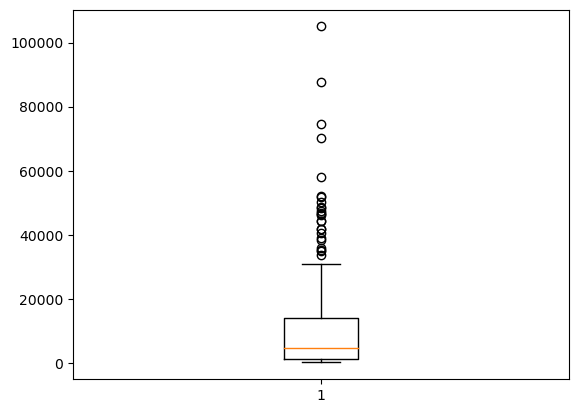

In [19]:
plt.boxplot(country_details.gdpp)

{'whiskers': [<matplotlib.lines.Line2D at 0x23e27a201d0>,
 'caps': [<matplotlib.lines.Line2D at 0x23e27a21550>,
 'boxes': [<matplotlib.lines.Line2D at 0x23e27a13910>],
 'medians': [<matplotlib.lines.Line2D at 0x23e27a22610>],
 'fliers': [<matplotlib.lines.Line2D at 0x23e27a22e50>],
 'means': []}

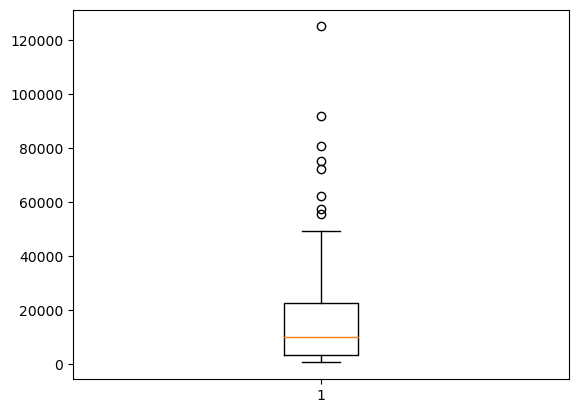

In [20]:
plt.boxplot(country_details.income)

{'whiskers': [<matplotlib.lines.Line2D object at 0x0000023E27A7A450>, <matplotlib.lines.Line2D object at 0x0000023E27A7AE90>], 'caps': [<matplotlib.lines.Line2D object at 0x0000023E27A7B7D0>, <matplotlib.lines.Line2D object at 0x0000023E27A88050>], 'boxes': [<matplotlib.lines.Line2D object at 0x0000023E27A79B10>], 'medians': [<matplotlib.lines.Line2D object at 0x0000023E27A889D0>], 'fliers': [<matplotlib.lines.Line2D object at 0x0000023E27A89010>], 'means': []}


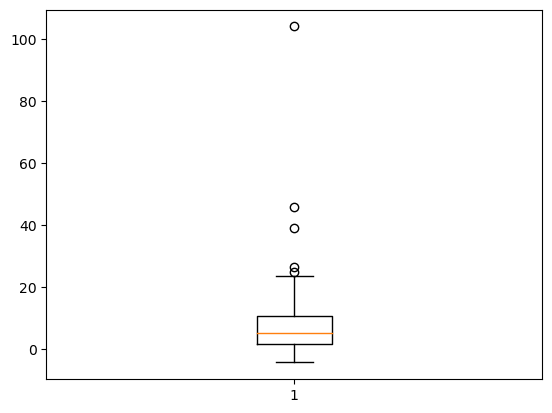

In [21]:
print(plt.boxplot(country_details.inflation))

Бачимо, що стовпець ВВП, доходу та інфляції має високі відхилення. Однак вилучати outliers з інфляції не будемо, оскільки це може призвести до втрати даних про країни, які не почуваються добре в соціально-економічному плані (країни, які найбільше потребують допомоги).

In [29]:
country_details.set_index('country',inplace = True)

Q1 = country_details.gdpp.quantile(0.05)
Q3 = country_details.gdpp.quantile(0.95)
#IQR = Q3-Q1
country_df = country_details[(country_details.gdpp <= Q3)]

country_df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,40.196203,39.447462,6.688671,46.378265,14614.955696,8.099367,69.966456,3.009620,9913.379747
std,40.622685,25.243334,2.683807,23.229783,15224.031790,10.759661,8.780099,1.533079,12717.283188
min,2.600000,0.109000,1.970000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,10.300000,23.575000,4.872500,30.475000,3290.000000,1.935000,64.150000,1.810000,1310.000000
50%,20.900000,34.000000,6.105000,43.250000,9790.000000,5.460000,71.850000,2.530000,4480.000000
75%,62.500000,50.675000,8.250000,58.475000,20100.000000,11.175000,76.400000,4.200000,12075.000000
90%,103.100000,68.030000,10.560000,72.110000,36200.000000,16.850000,80.030000,5.346000,31670.000000
95%,116.450000,77.615000,11.345000,80.320000,41415.000000,21.125000,80.960000,5.912000,41815.000000
99%,154.300000,119.256000,13.573000,127.780000,73433.000000,42.081000,82.301000,6.567200,47115.000000


Бачимо, що більшість викидів обробляються лише обробкою стовпця ВВП.

In [30]:
country_df.shape

(158, 9)

<Figure size 400x400 with 0 Axes>

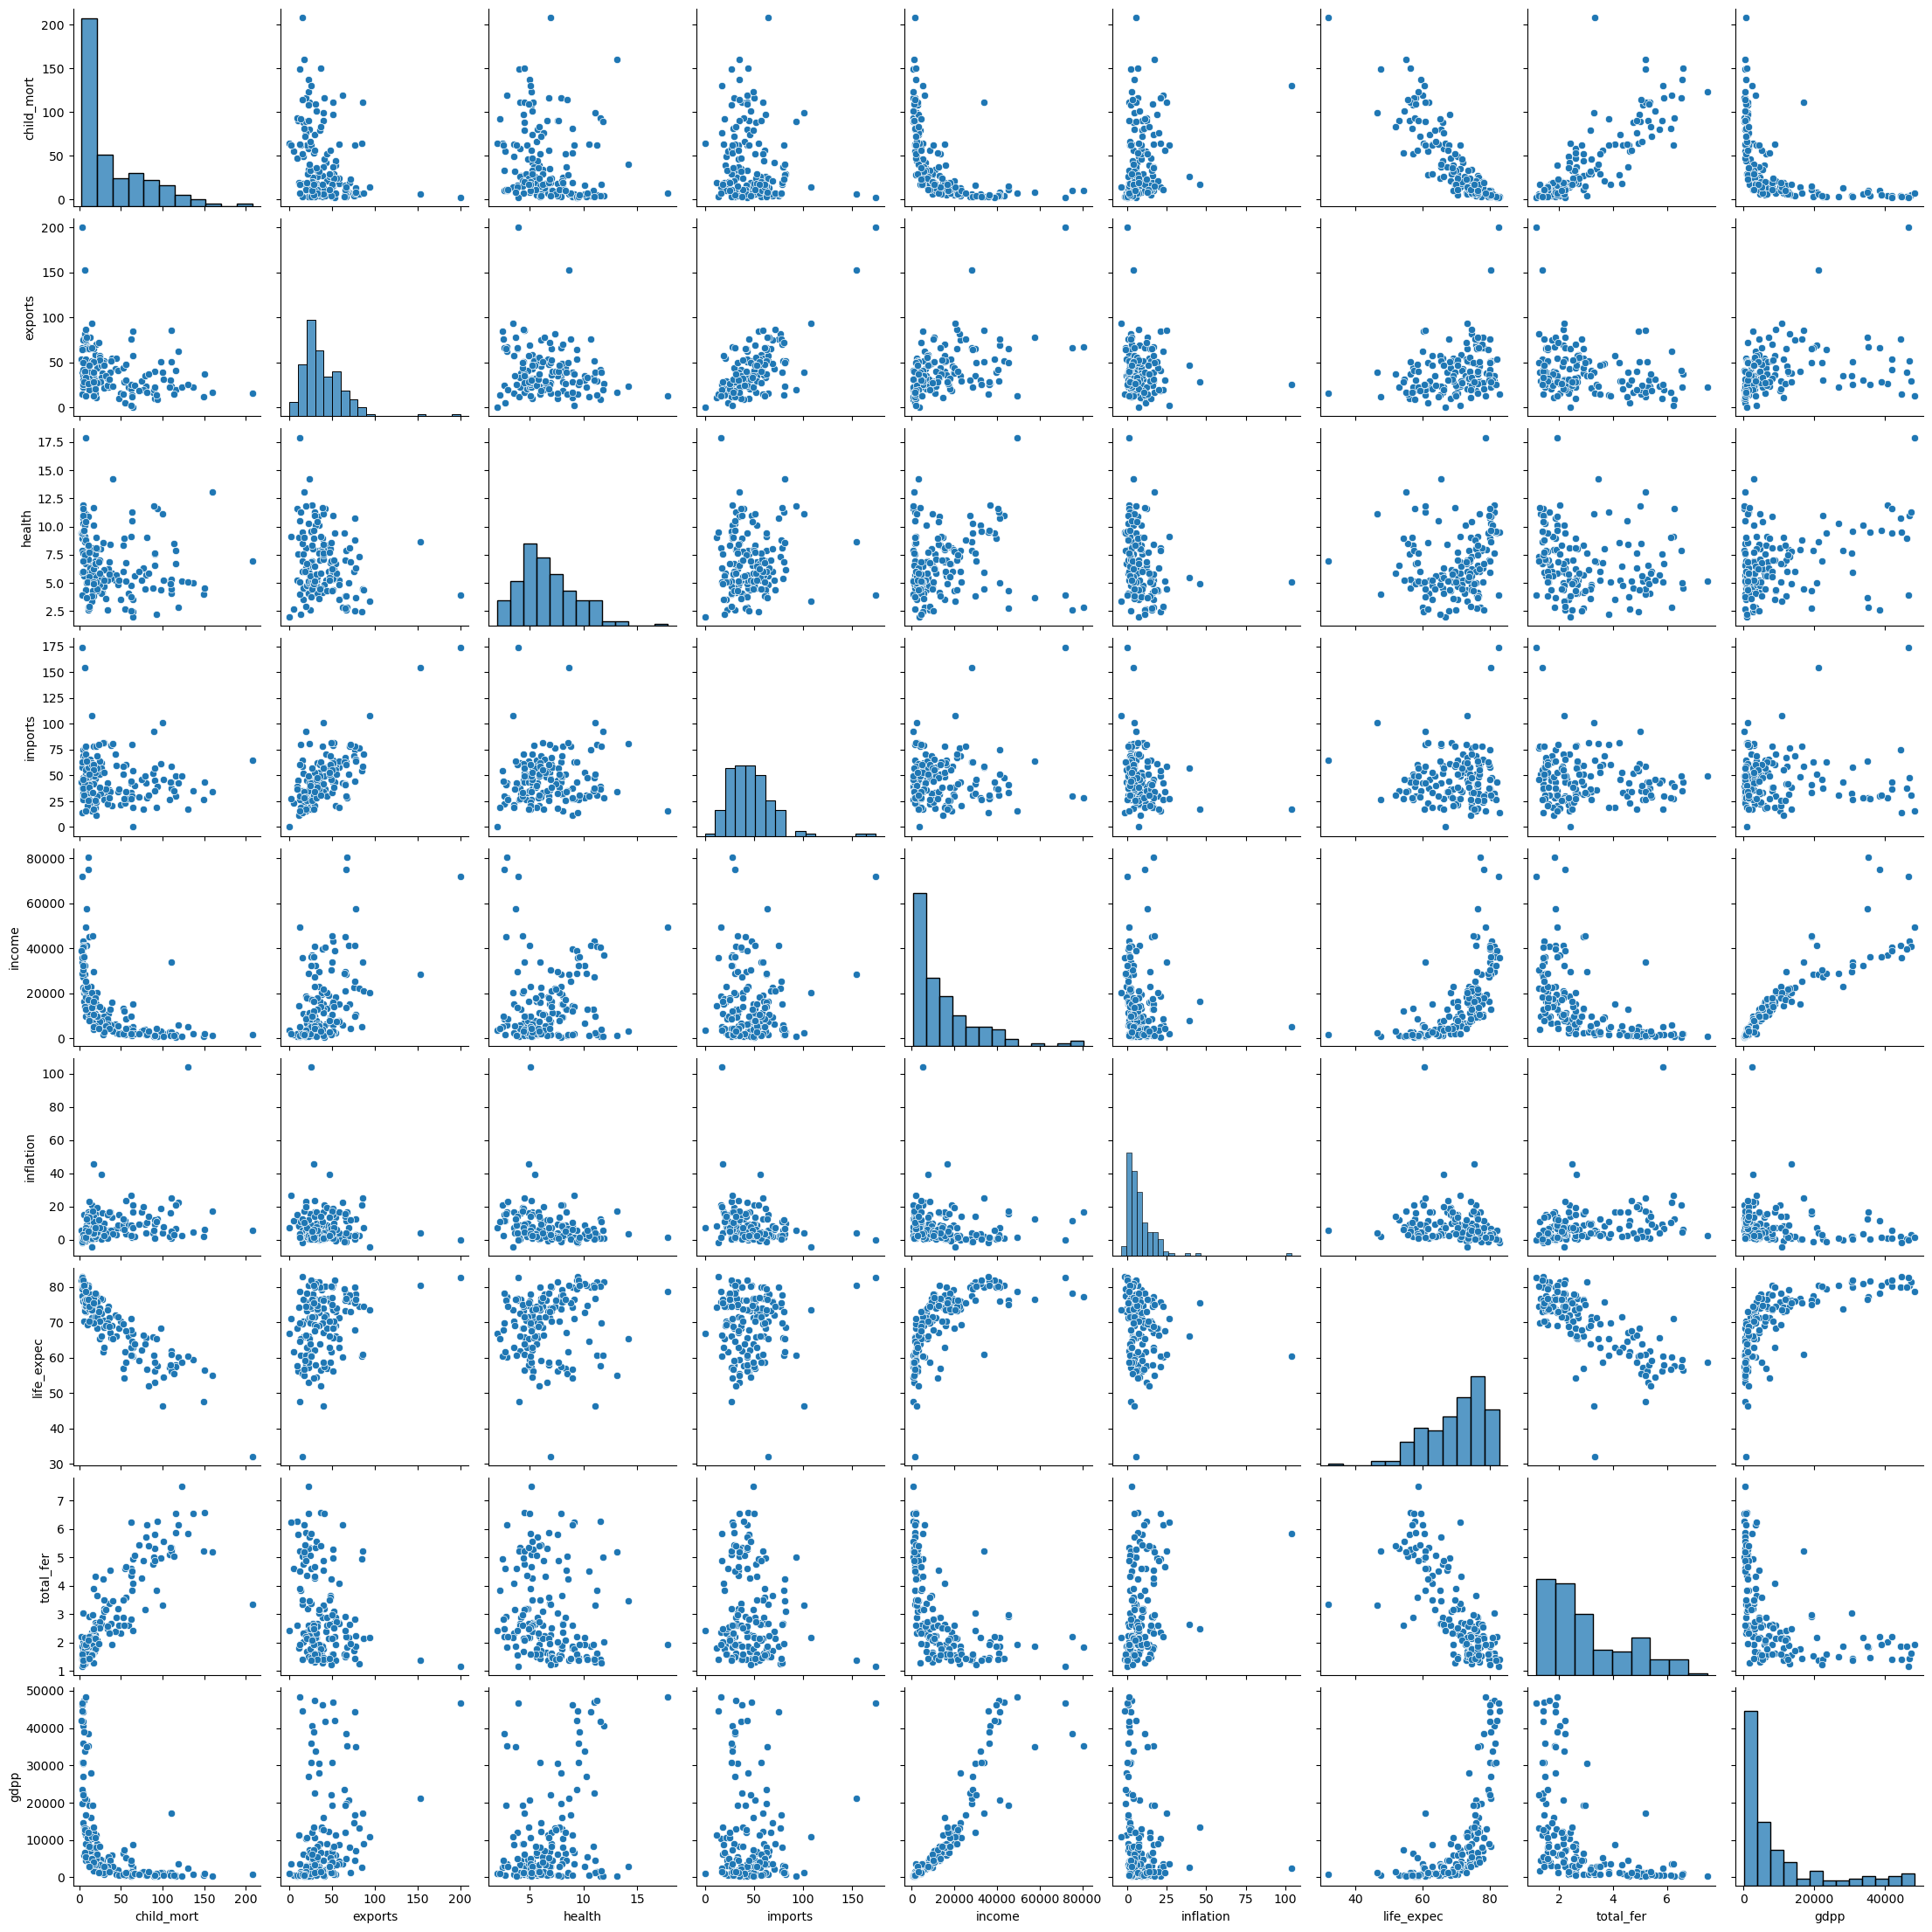

In [31]:
plt.figure(figsize = (4,4))
sns.pairplot(country_df)
plt.show()

<Axes: >

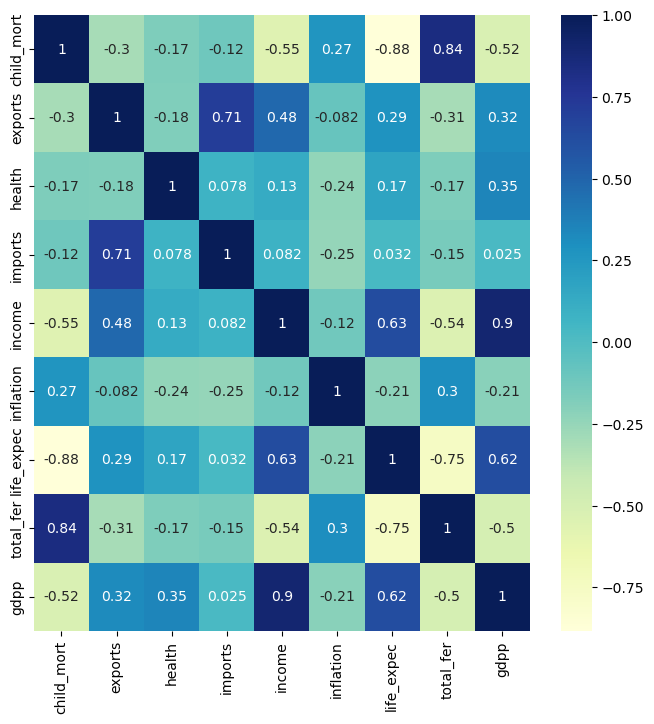

In [32]:
# Let us draw heatmap to understand the corelation better.
plt.figure(figsize = (8,8))  
sns.heatmap(country_df.corr(),annot = True,cmap="YlGnBu")

Бачимо високу кореляцію між total_fer і child_mort, між gdpp і доходом, а також між імпортом і експортом

In [33]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
country_norm = standard_scaler.fit_transform(country_df)

country_norm = pd.DataFrame(country_norm)
country_norm.columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation','life_expec','total_fer','gdpp']
country_norm.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.234847,-1.170253,0.333170,-0.063839,-0.856955,0.124994,-1.572901,1.838989,-0.738376
1,-0.582710,-0.454926,-0.051834,0.095946,-0.308713,-0.336520,0.723646,-0.889676,-0.459367
2,-0.318473,-0.041627,-0.941453,-0.646837,-0.113006,0.745941,0.746497,-0.078274,-0.430180
3,1.946065,0.908169,-1.434856,-0.150209,-0.574267,1.333323,-1.127302,2.061470,-0.503541
4,-0.738289,0.240530,-0.246204,0.540752,0.295540,-0.620888,0.780774,-0.575585,0.180376


In [34]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [39]:

#Виконання PCA на даних
pca.fit(country_norm)

colnames = list(country_norm.columns)
pca_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],
                       'PC4':pca.components_[3], 'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6], 'PC8':pca.components_[7],'PC9':pca.components_[8],
                       'Feature':colnames})
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,Feature
0,-0.429031,0.111571,-0.041559,0.378896,-0.210303,0.186245,0.021920,0.717303,0.253528,child_mort
1,0.255210,0.626380,0.165804,0.125334,0.020562,-0.050135,-0.687057,0.084911,-0.130857,exports
2,0.134178,-0.277405,-0.621898,0.418107,0.497644,-0.004283,-0.286172,-0.018871,0.116417,health
3,0.131450,0.677160,-0.300547,0.039231,0.262212,-0.042643,0.598129,-0.016664,0.060813,imports
4,0.407693,-0.023188,0.252933,0.408208,-0.260517,0.145028,0.087549,-0.298465,0.645748,income
5,-0.179172,-0.051654,0.641231,0.246847,0.688801,0.064892,0.111285,0.005323,-0.045257,inflation
6,0.431281,-0.167479,0.120926,-0.231648,0.129156,-0.605914,0.060919,0.521296,0.241639,life_expec
7,-0.414624,0.074837,0.005912,0.366643,-0.165619,-0.754047,-0.003597,-0.303233,-0.006760,total_fer
8,0.399105,-0.151147,0.062332,0.498720,-0.229168,0.000134,0.253074,0.157553,-0.651057,gdpp


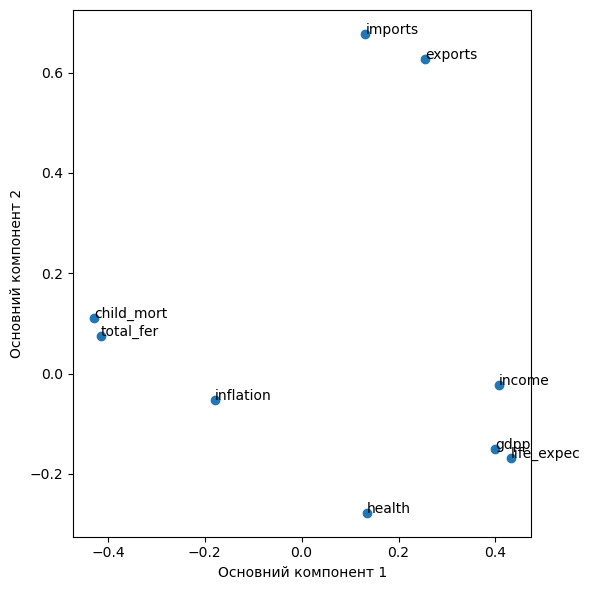

In [40]:
%matplotlib inline
fig = plt.figure(figsize = (6,6))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Основний компонент 1')
plt.ylabel('Основний компонент 2')
for i, txt in enumerate(pca_df.Feature):
    plt.annotate(txt, (pca_df.PC1[i],pca_df.PC2[i]))
plt.tight_layout()
plt.show()

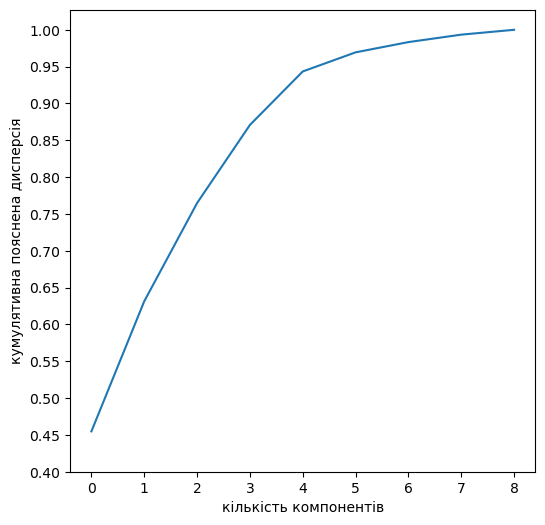

In [66]:
#Створення сценарної діаграми - побудова графіка кумулятивної дисперсії від кількості компонентів
%matplotlib inline
fig = plt.figure(figsize = (6,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('кількість компонентів')
plt.ylabel('кумулятивна пояснена дисперсія')
plt.yticks(np.arange(0.4,1.05,0.05))
plt.show()

Близько 95% дисперсії пояснюється 5 компонентами

In [42]:
#Використання інкрементного PCA для підвищення ефективності
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

df_final1 = pca_final.fit_transform(country_norm)
df_final1.shape

(158, 5)

кореляція після PCA

<Axes: >

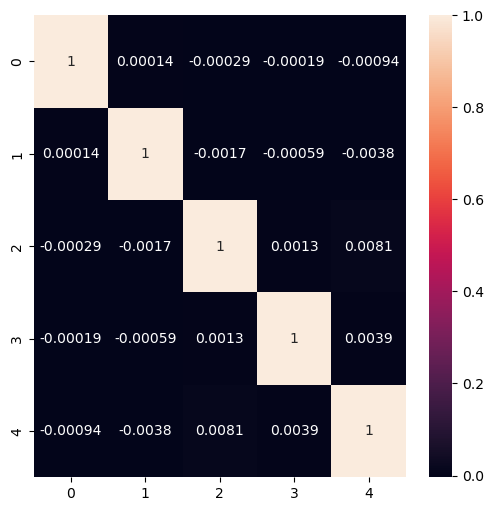

In [43]:
corrmat = np.corrcoef(df_final1.transpose())

%matplotlib inline
plt.figure(figsize = (6,6))
sns.heatmap(corrmat,annot = True)

In [44]:
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.008069188238944973 , min corr:  -0.003831881633285865


Тепер бачимо, що кореляції дійсно дуже близькі до 0

Створення транспонування, щоб кожен стовпець був правильно впорядкований:

In [45]:
pc = np.transpose(df_final1)
df_final = pd.DataFrame({'PC1':pc[0],'PC2':pc[1], 'PC3':pc[2], 'PC4':pc[3],'PC5':pc[4]})
df_final.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.899440,-0.210920,-0.794008,0.808073,-0.151098
1,0.571663,-0.365855,-0.285368,-1.233879,0.278467
2,-0.082299,-0.334262,1.307774,-0.813505,0.215401
3,-2.830780,1.451765,1.559083,1.124602,-0.375038
4,1.295018,0.323543,-0.154906,-0.664375,-0.173215


K-Means з деяким K

(13, 2)

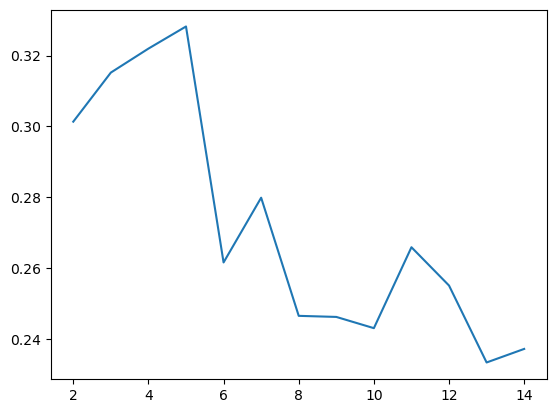

In [65]:
from sklearn.metrics import silhouette_score
sse_ = []
df_km = df_final
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(df_km)
    sse_.append([k, silhouette_score(df_km, kmeans.labels_)])

plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])


Дивлячись на аналіз силуету, бачимо, що найвищий пік припадає на k = 5, а на графіку суми квадратів відстаней ми бачимо, що лікоть знаходиться в діапазоні від 4 до 6, тому приймемо k за 5.

In [47]:
model_clus5 = KMeans(n_clusters = 5, max_iter=50,random_state = 50)
model_clus5.fit(df_km)

df_km1 = df_final
df_km1.index = pd.RangeIndex(len(df_km1.index))
countries_detail_km = pd.concat([df_km1, pd.Series(model_clus5.labels_)], axis=1)
countries_detail_km.columns = ['PC1', 'PC2','PC3','PC4','PC5','ClusterID']
countries_detail_km.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,1
1,0.571663,-0.365855,-0.285368,-1.233879,0.278467,3
2,-0.082299,-0.334262,1.307774,-0.813505,0.215401,0
3,-2.830780,1.451765,1.559083,1.124602,-0.375038,1
4,1.295018,0.323543,-0.154906,-0.664375,-0.173215,3


<Axes: xlabel='PC1', ylabel='PC2'>

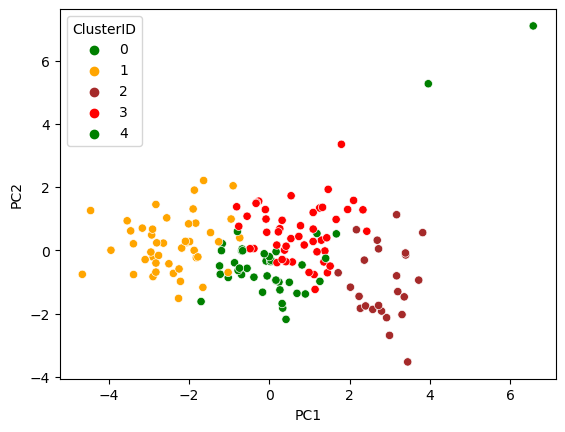

In [48]:
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=countries_detail_km, palette=['green','orange','brown','red'])


<Axes: xlabel='PC3', ylabel='PC4'>

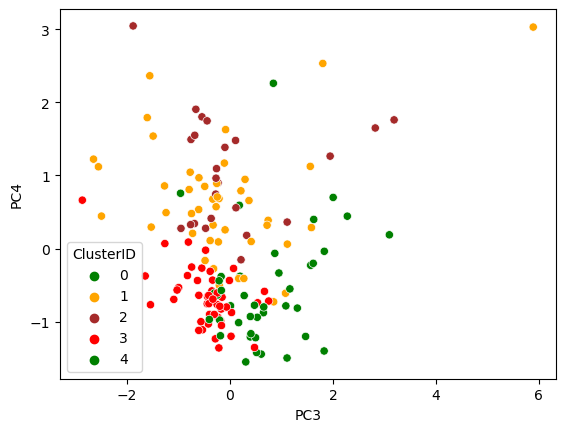

In [49]:
sns.scatterplot(x='PC3',y='PC4',hue='ClusterID',legend='full',data=countries_detail_km,palette=['green','orange','brown','red'])


In [50]:
country_merge_km=pd.merge(country_df.reset_index(),countries_detail_km,left_index=True,right_index=True )
country_merge_km.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,PC1,PC2,PC3,PC4,PC5,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,-2.899440,-0.210920,-0.794008,0.808073,-0.151098,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0.571663,-0.365855,-0.285368,-1.233879,0.278467,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,-0.082299,-0.334262,1.307774,-0.813505,0.215401,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,-2.830780,1.451765,1.559083,1.124602,-0.375038,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1.295018,0.323543,-0.154906,-0.664375,-0.173215,3


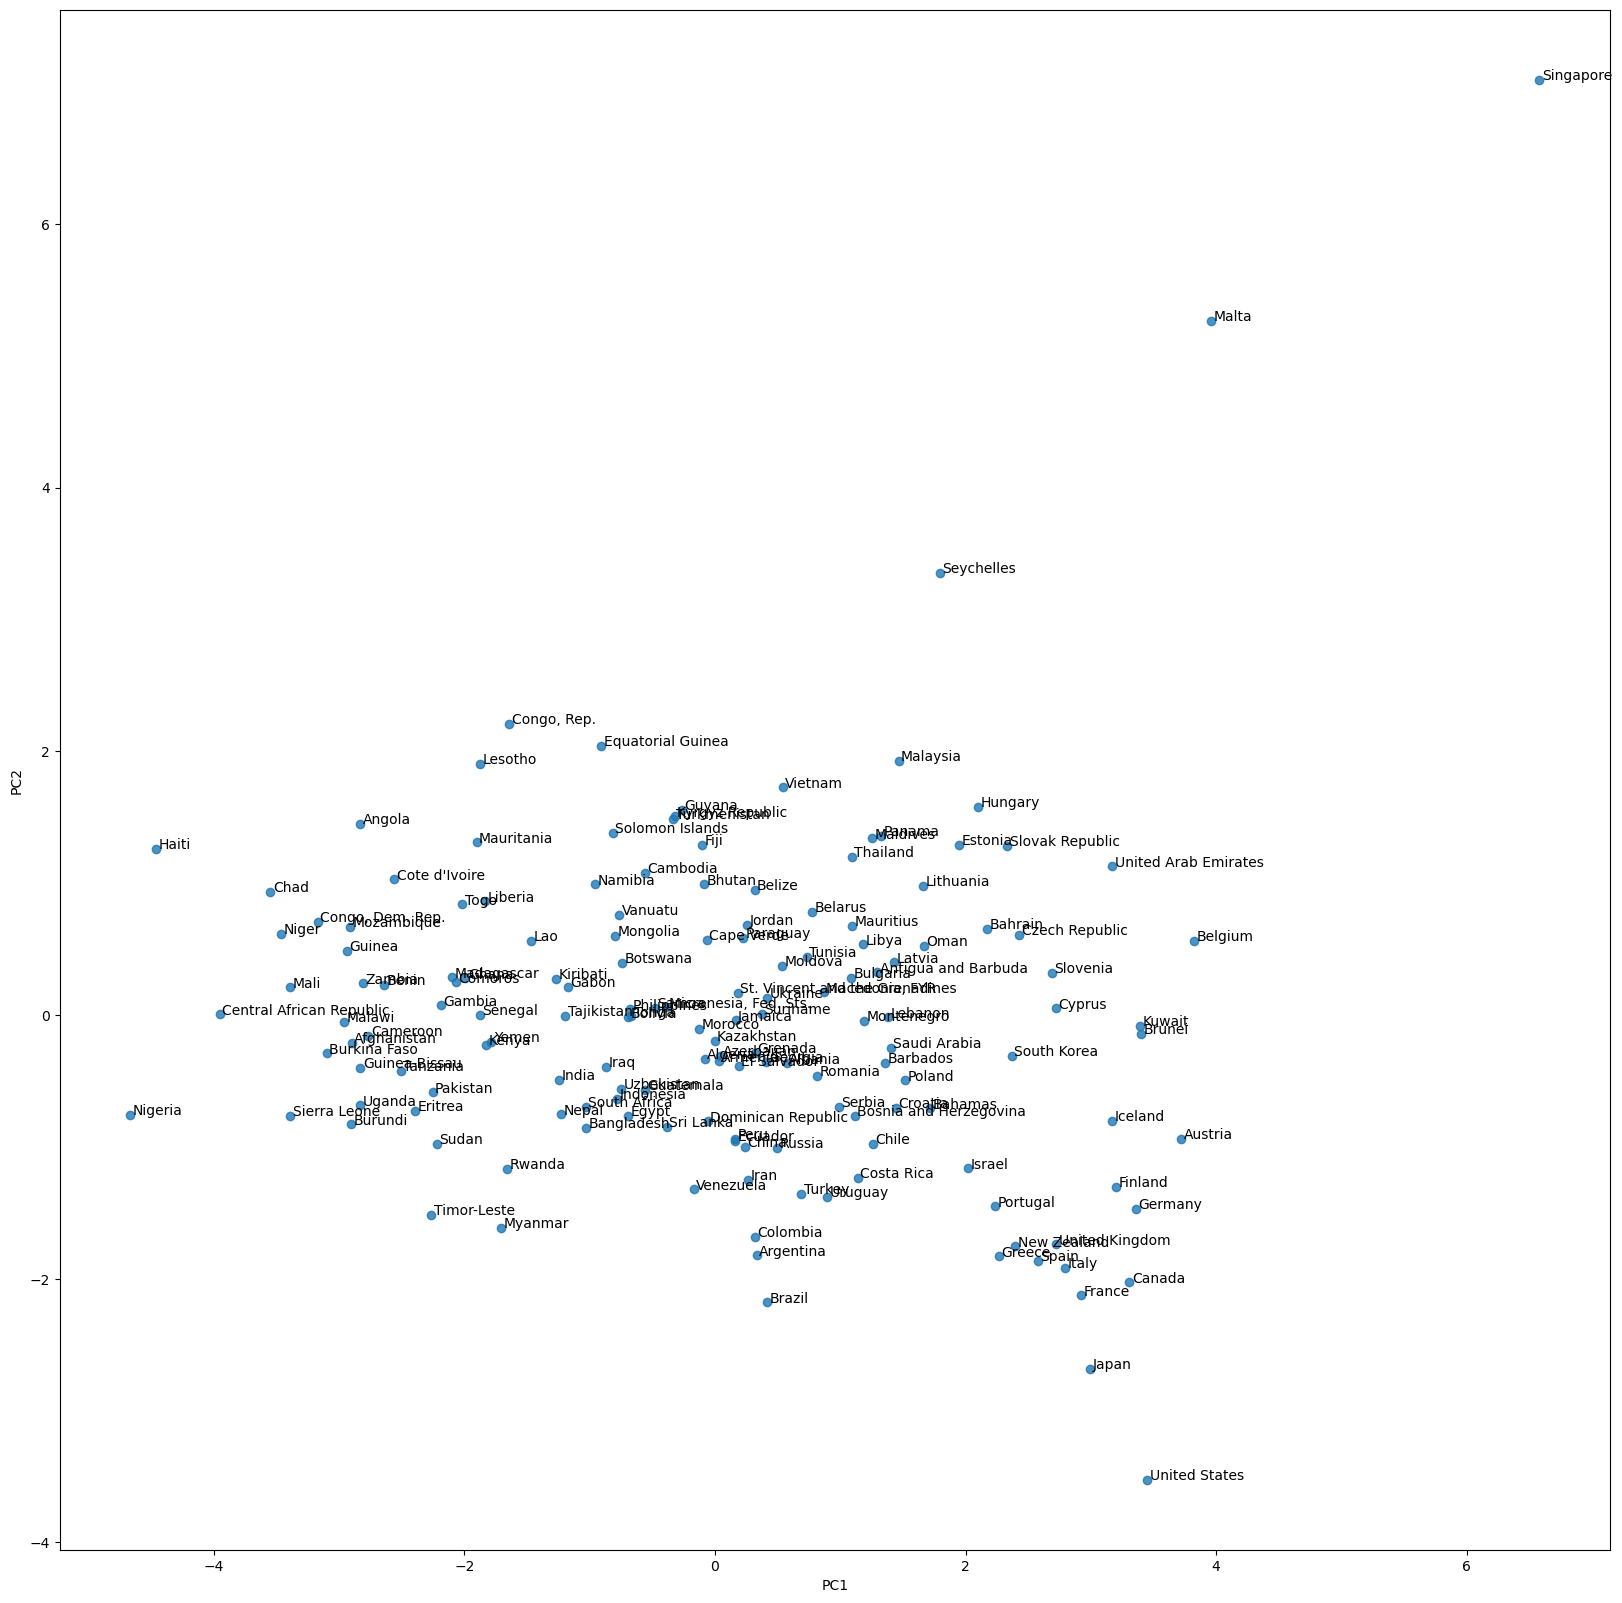

In [51]:
plt.figure(figsize=(20, 20))
sns.regplot(x='PC1', y='PC2', data=country_merge_km, fit_reg=False)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(country_merge_km.PC1, country_merge_km.PC2, country_merge_km.country, plt.gca()) 

<Axes: xlabel='child_mort', ylabel='health'>

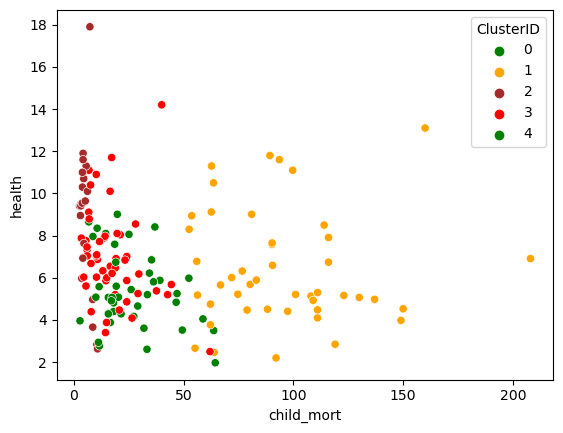

In [52]:
sns.scatterplot(x='child_mort',y='health',hue='ClusterID',legend='full',data=country_merge_km,palette=['green','orange','brown','red'])


<Axes: xlabel='income', ylabel='gdpp'>

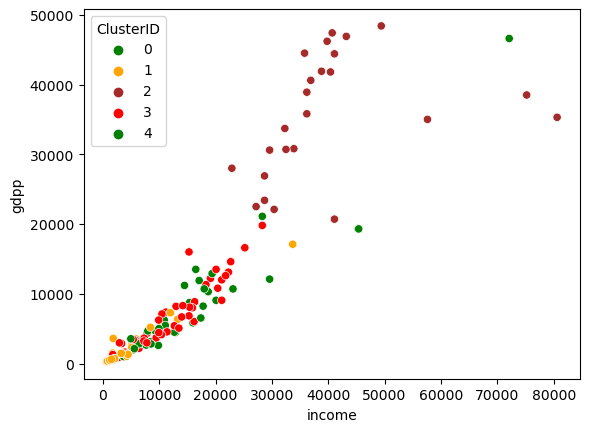

In [53]:
sns.scatterplot(x='income',y='gdpp',hue='ClusterID',legend='full',data=country_merge_km,palette=['green','orange','brown','red'])


<Axes: xlabel='health', ylabel='income'>

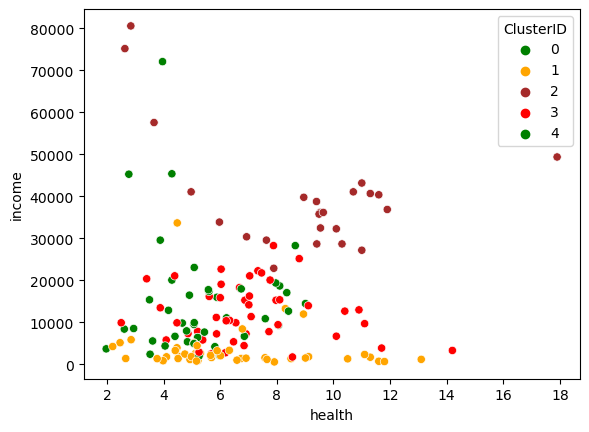

In [54]:
sns.scatterplot(x='health',y='income',hue='ClusterID',legend='full',data=country_merge_km,palette=['green','orange','brown','red'])


<Axes: xlabel='child_mort', ylabel='inflation'>

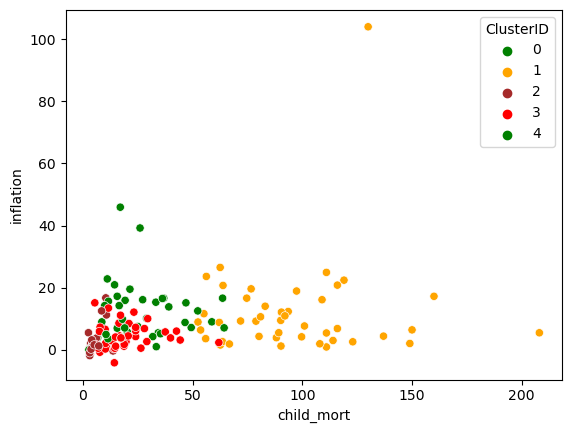

In [55]:
sns.scatterplot(y='inflation',x='child_mort',hue='ClusterID',legend='full',data=country_merge_km,palette=['green','orange','brown','red'])


In [56]:
country_final=country_merge_km.drop(['PC1','PC2','PC3','PC4','PC5'],axis=1)
country_final.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,3
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,3


Отже, ми виконали кластеризацію за допомогою PC і тепер розподілили ідентифікатори кластера назад для кожної з вихідних точок даних

Аналіз кластерів:

In [58]:
child_mort_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).child_mort.mean())
exports_mean= 	pd.DataFrame(country_final.groupby(["ClusterID"]).exports.mean())
health_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).health.mean())
imports_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).imports.mean())
income_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).income.mean())
inflat_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).inflation.mean())
life_expec_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).life_expec.mean())
total_fer_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).total_fer.mean())
gdpp_mean = 	pd.DataFrame(country_final.groupby(["ClusterID"]).gdpp.mean())

country_analysis_df = pd.concat([pd.Series([0,1,2,3]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflat_mean,life_expec_mean,
                                 total_fer_mean,gdpp_mean], axis=1)

country_analysis_df.columns = ["ClusterID","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
country_analysis_df


,ClusterID,child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflation_mean,life_expec_mean,total_fer_mean,gdpp_mean
0,0.0,27.853846,29.986897,5.321795,30.729895,13026.923077,12.404513,72.371795,2.558718,6241.435897
1,1.0,94.857778,28.289111,6.407778,43.026667,3493.177778,11.816111,58.926667,5.038667,1713.377778
2,2.0,5.570833,42.575000,8.928333,38.575000,39966.666667,3.044458,79.762500,1.780000,35625.000000
3,3.0,17.766667,50.320833,6.958750,61.235417,12173.333333,3.903083,72.983333,2.161667,6731.166667
4,NaN,4.800000,176.500000,6.305000,164.000000,50200.000000,1.892000,81.500000,1.255000,33850.000000


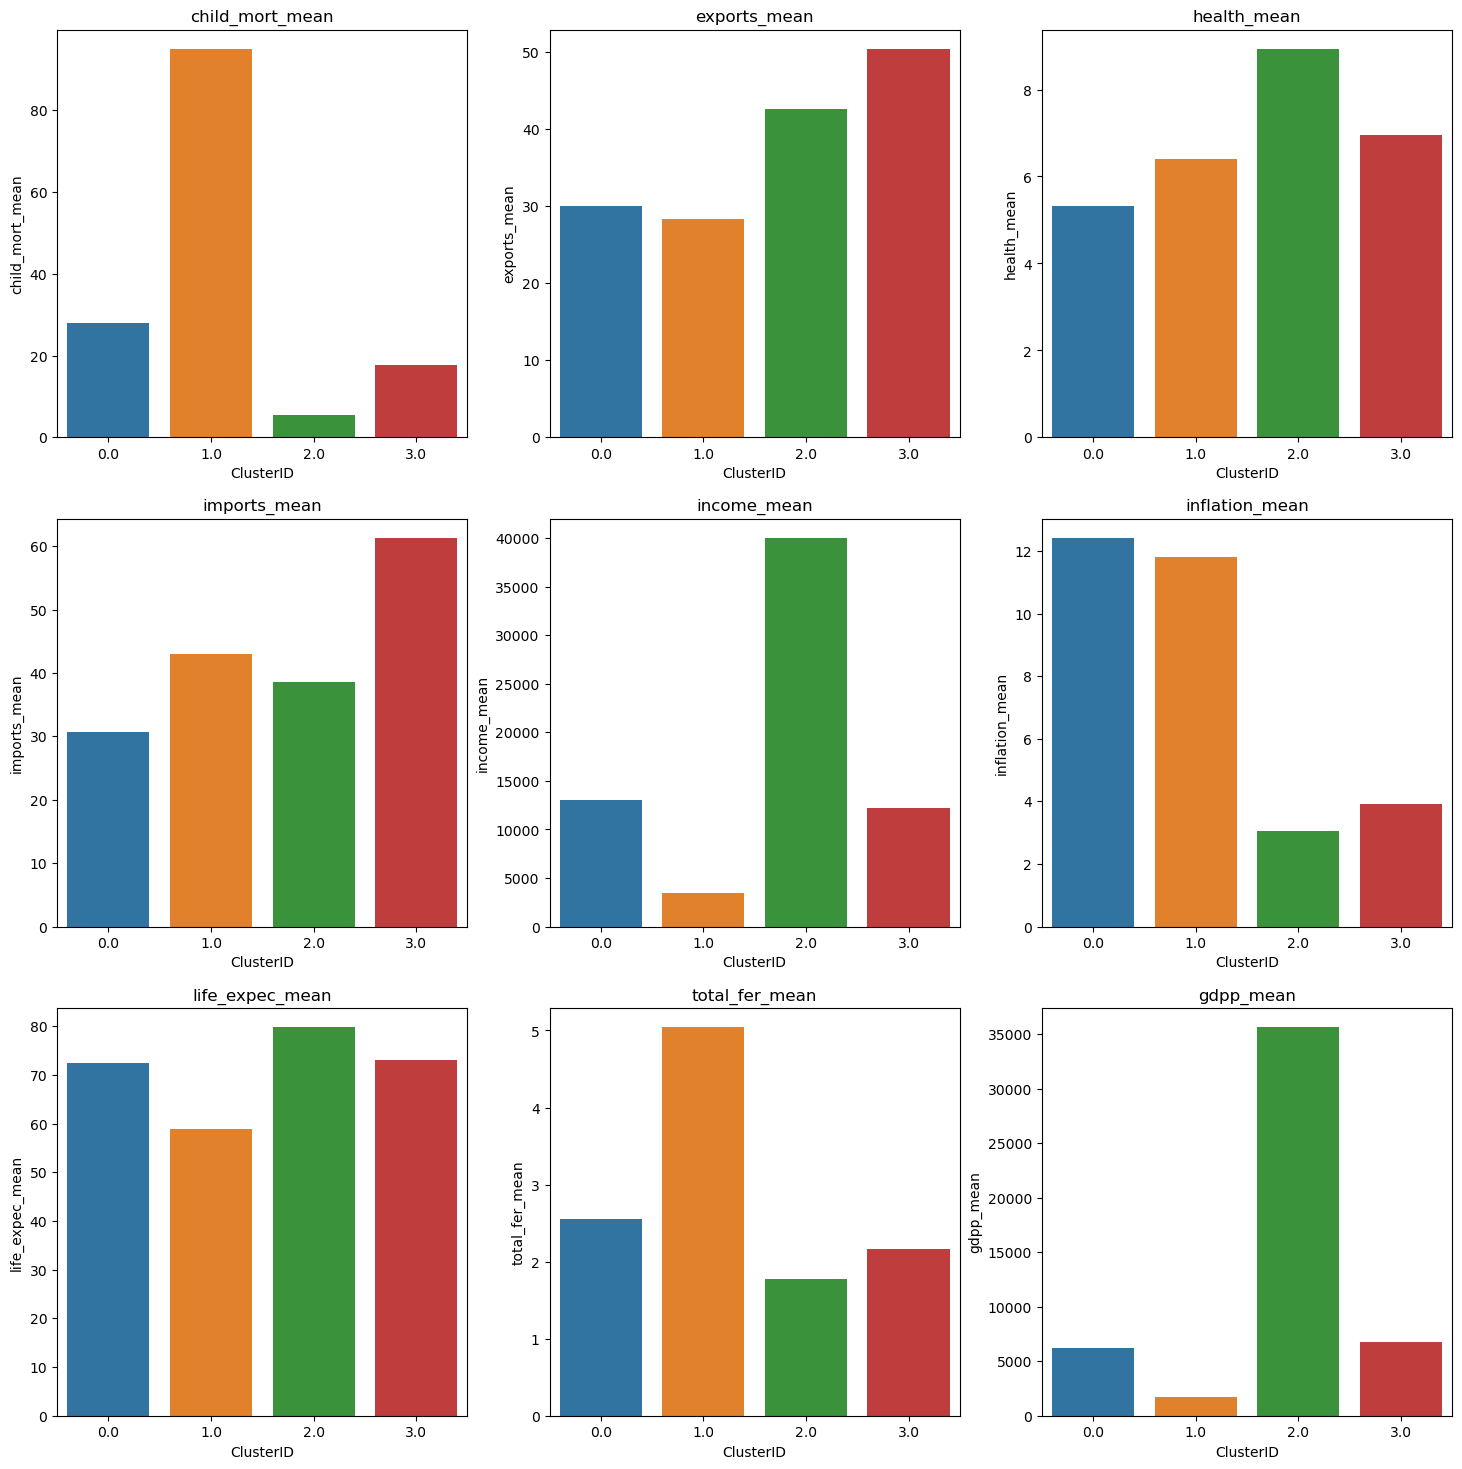

In [59]:
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(x = country_analysis_df.ClusterID, y = country_analysis_df.child_mort_mean)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean")
sns.barplot(x = country_analysis_df.ClusterID, y = country_analysis_df.exports_mean)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean")
sns.barplot(x = country_analysis_df.ClusterID, y = country_analysis_df.health_mean)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean")
sns.barplot(x = country_analysis_df.ClusterID, y = country_analysis_df.imports_mean)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean")
sns.barplot(x = country_analysis_df.ClusterID, y = country_analysis_df.income_mean)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean")
sns.barplot(x = country_analysis_df.ClusterID, y = country_analysis_df.inflation_mean)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean")
sns.barplot(x = country_analysis_df.ClusterID, y = country_analysis_df.life_expec_mean)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean")
sns.barplot(x = country_analysis_df.ClusterID, y = country_analysis_df.total_fer_mean)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean")
sns.barplot(x = country_analysis_df.ClusterID, y = country_analysis_df.gdpp_mean)

plt.show()


Дивлячись на графік, зрозуміло, що кластер 1 є кластером, який нас цікавить. Тому що: 
1. Тут найвища дитяча смертність 
2. Найнижчий дохід 
3. Найнижчий ВВП.

In [122]:
cluster_km=country_final[country_final['ClusterID']==1]
cluster_km.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(5)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,ClusterID
25,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,1
85,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,1
36,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,1
107,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,1
125,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.20,55.0,5.20,399,1


Відповідно до K-means кластерів, країни, які найбільше потребують допомоги: 
1. Бурунді 
2. Ліберія 
3. Конго, Дем. Представник 
4. Нігерія 
5. Сьєрра-Леоне 